<a href="https://colab.research.google.com/github/riskydevandra/soft_computing_praktik/blob/main/M07_SCP_5200411476_RiskyDevandraHartana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
5200411476
risky devandra hartana
responsi soft computing
'''

'\n5200411476\nrisky devandra hartana\nresponsi soft computing\n'

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
#semesta 
x_hujan = np.arange(31, 689, 1)
x_lahan = np.arange (12500, 29368, 1)
x_tingkat_permintaan = np.arange (3003550, 4200000, 1)
x_produksi_bumbu = np.arange (2300, 2800000, 1)

In [ ]:
#fungsi keanggotaan fuzzy 
hujan_rendah = fuzz.trapmf(x_hujan, [31,31,250,360])
hujan_sedang = fuzz.trimf(x_hujan, [250,360,469])
hujan_tinggi = fuzz.trapmf(x_hujan, [360,469,689,689])

lahan_kecil = fuzz.trapmf(x_lahan, [12500, 12500, 18163, 20964])
lahan_sedang = fuzz.trimf(x_lahan, [18163,20964,23766])
lahan_besar = fuzz.trapmf(x_lahan, [20964,23766,29368, 29368])

tingkat_permintaan_rendah = fuzz.trimf(x_tingkat_permintaan, [3003550,3003550,4200000])
tingkat_permintaan_tinggi = fuzz.trimf(x_tingkat_permintaan, [3003550,4200000,4200000])

produksi_bumbu_sedikit = fuzz.trapmf(x_produksi_bumbu, [2300,2300,934867,1401150])
produksi_bumbu_sedang = fuzz.trimf(x_produksi_bumbu, [934867,1401150,1867434])
produksi_bumbu_banyak = fuzz.trapmf(x_produksi_bumbu, [1401150,1867434,2800000,2800000])

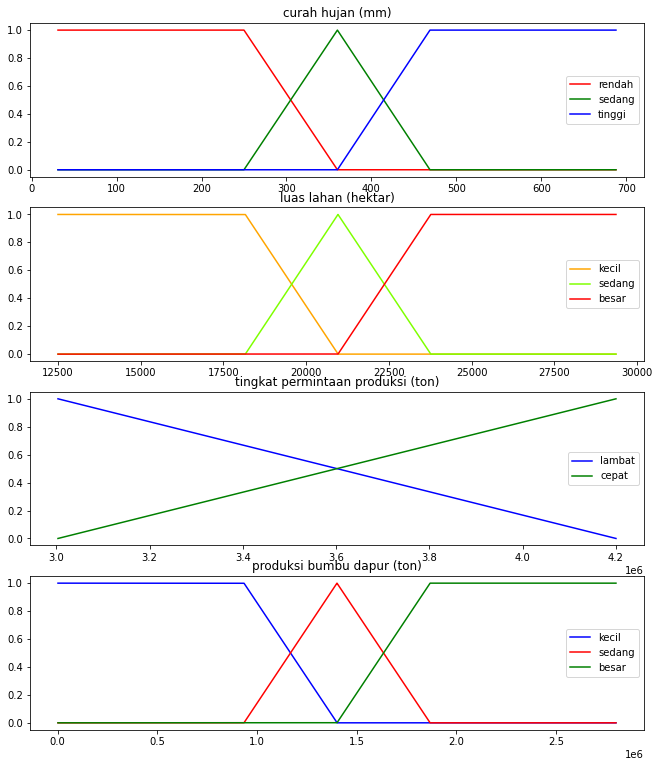

In [ ]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4, figsize=(11,13))

ax0.plot(x_hujan, hujan_rendah, "r", linewidth=1.5, label="rendah")
ax0.plot(x_hujan, hujan_sedang, "g", linewidth=1.5, label="sedang")
ax0.plot(x_hujan, hujan_tinggi, "b", linewidth=1.5, label="tinggi")
ax0.set_title("curah hujan (mm)")
ax0.legend()

ax1.plot(x_lahan, lahan_kecil, "orange", linewidth = 1.5, label="kecil")
ax1.plot(x_lahan, lahan_sedang, "chartreuse", linewidth = 1.5, label="sedang")
ax1.plot(x_lahan, lahan_besar, "r", linewidth = 1.5, label="besar")
ax1.set_title("luas lahan (hektar)")
ax1.legend()

ax2.plot(x_tingkat_permintaan, tingkat_permintaan_rendah, "b", linewidth = 1.5, label="lambat")
ax2.plot(x_tingkat_permintaan, tingkat_permintaan_tinggi, "g", linewidth = 1.5, label="cepat")
ax2.set_title("tingkat permintaan produksi (ton)")
ax2.legend()

ax3.plot(x_produksi_bumbu, produksi_bumbu_sedikit, "b", linewidth = 1.5, label="kecil")
ax3.plot(x_produksi_bumbu, produksi_bumbu_sedang, "r", linewidth = 1.5, label="sedang")
ax3.plot(x_produksi_bumbu, produksi_bumbu_banyak, "g", linewidth = 1.5, label="besar")
ax3.set_title("produksi bumbu dapur (ton)")
ax3.legend()

In [ ]:
#Fuzzifikasi dari input
level_hujan_rendah = fuzz.interp_membership(x_hujan, hujan_rendah, 200)
level_hujan_sedang = fuzz.interp_membership(x_hujan, hujan_sedang, 200)
level_hujan_tinggi = fuzz.interp_membership(x_hujan, hujan_tinggi, 200)

level_lahan_kecil = fuzz.interp_membership(x_lahan, lahan_kecil, 15000)
level_lahan_sedang = fuzz.interp_membership(x_lahan, lahan_sedang, 15000)
level_lahan_besar = fuzz.interp_membership(x_lahan, lahan_besar, 15000)

level_permintaan_rendah = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_rendah, 3800000)
level_permintaan_tinggi = fuzz.interp_membership(x_tingkat_permintaan, tingkat_permintaan_tinggi, 3800000)

print(level_hujan_rendah, level_hujan_sedang, level_hujan_tinggi)
print(level_lahan_kecil, level_lahan_sedang, level_lahan_besar)
print(level_permintaan_rendah, level_permintaan_tinggi)

1.0 0.0 0.0
1.0 0.0 0.0
0.33432237034560575 0.6656776296543943


In [ ]:
#=========================rule=========================================

#sedikit
rule_1=min(level_hujan_rendah, level_lahan_kecil,level_permintaan_rendah)

#sedang
rule_2=min(level_hujan_rendah, level_lahan_kecil,level_permintaan_tinggi)

#sedikit 
rule_3=min(level_hujan_rendah, level_lahan_sedang,level_permintaan_rendah)

#banyak
rule_4=min(level_hujan_rendah, level_lahan_sedang,level_permintaan_tinggi)

#sedikit
rule_5=min(level_hujan_rendah, level_lahan_besar,level_permintaan_rendah)

#sedang
rule_6=min(level_hujan_rendah, level_lahan_besar,level_permintaan_tinggi)

#sedikit
rule_7=min(level_hujan_sedang, level_lahan_kecil,level_permintaan_rendah)

#banyak
rule_8=min(level_hujan_sedang, level_lahan_kecil,level_permintaan_tinggi)

#sedang
rule_9=min(level_hujan_sedang, level_lahan_kecil,level_permintaan_rendah)

#banyak
rule_10=min(level_hujan_sedang, level_lahan_kecil,level_permintaan_tinggi)

#sedang
rule_11=min(level_hujan_sedang, level_lahan_besar,level_permintaan_rendah)

#banyak
rule_12=min(level_hujan_sedang, level_lahan_besar,level_permintaan_tinggi)

#sedikit
rule_13=min(level_hujan_tinggi, level_lahan_kecil,level_permintaan_rendah)

#sedang
rule_14=min(level_hujan_tinggi, level_lahan_kecil,level_permintaan_tinggi)

#sedang
rule_15=min(level_hujan_tinggi, level_lahan_kecil,level_permintaan_rendah)

#banyak
rule_16=min(level_hujan_tinggi, level_lahan_kecil,level_permintaan_tinggi)

#sedikit
rule_17=min(level_hujan_tinggi, level_lahan_besar,level_permintaan_rendah)

#banyak
rule_18=min(level_hujan_tinggi, level_lahan_besar,level_permintaan_tinggi)

print(rule_1,rule_2,rule_3,rule_4,rule_5,rule_6, rule_7, rule_8, rule_9, rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18)

#===================output=====================================
activation_rule_1=np.fmin(rule_1, produksi_bumbu_sedikit)
activation_rule_2=np.fmin(rule_2, produksi_bumbu_sedang)
activation_rule_3=np.fmin(rule_3, produksi_bumbu_sedikit)
activation_rule_4=np.fmin(rule_4, produksi_bumbu_banyak)
activation_rule_5=np.fmin(rule_5, produksi_bumbu_sedikit)
activation_rule_6=np.fmin(rule_6, produksi_bumbu_sedang)
activation_rule_7=np.fmin(rule_7, produksi_bumbu_sedikit)
activation_rule_8=np.fmin(rule_8, produksi_bumbu_banyak)
activation_rule_9=np.fmin(rule_9, produksi_bumbu_sedang)
activation_rule_10=np.fmin(rule_10, produksi_bumbu_banyak)
activation_rule_11=np.fmin(rule_11, produksi_bumbu_sedang)
activation_rule_12=np.fmin(rule_12, produksi_bumbu_banyak)
activation_rule_13=np.fmin(rule_13, produksi_bumbu_sedikit)
activation_rule_14=np.fmin(rule_14, produksi_bumbu_sedang)
activation_rule_15=np.fmin(rule_15, produksi_bumbu_sedang)
activation_rule_16=np.fmin(rule_16, produksi_bumbu_banyak)
activation_rule_17=np.fmin(rule_17, produksi_bumbu_sedikit)
activation_rule_18=np.fmin(rule_18, produksi_bumbu_banyak)

produksi0 = np.zeros_like(x_produksi_bumbu)

0.33432237034560575 0.6656776296543943 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


Text(0.5, 1.0, 'Hasil Aktivasi Rule (Fungsi Min)')

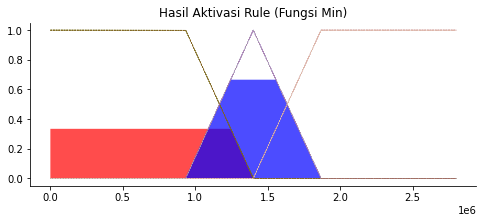

In [ ]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_1, facecolor='r', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_2, facecolor='b', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_3, facecolor='g', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_4, facecolor='m', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_5, facecolor='chartreuse', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'chartreuse', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_6, facecolor='teal', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'teal', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_7, facecolor='black', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'black', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_8, facecolor='grey', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'grey', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_9,facecolor='purple', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'purple', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_10, facecolor='gold', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'gold', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_11, facecolor='magenta', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'magenta', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_12, facecolor='orchid', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'orchid', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_13, facecolor='yellowgreen', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'yellowgreen', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_14, facecolor='tomato', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'tomato', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_15, facecolor='aquamarine', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, 'aquamarine', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_16, facecolor='peru', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'peru', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_17, facecolor='brown', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, 'brown', linewidth=0.5, linestyle='--')
ax0.fill_between(x_produksi_bumbu, produksi0, activation_rule_18, facecolor='azure', alpha=0.7)
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, 'azure', linewidth=0.5, linestyle='--')

for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom
  ax.get_yaxis().tick_left
plt.tight_layout
plt.title('Hasil Aktivasi Rule (Fungsi Min)')

In [ ]:
aggregated = np.fmax(activation_rule_1,
                     np.fmax(activation_rule_2, 
                             np.fmax(activation_rule_3,
                                     np.fmax(activation_rule_4,
                                             np.fmax(activation_rule_5,
                                                     np.fmax(activation_rule_6,
                                                             np.fmax(activation_rule_7,
                                                                     np.fmax(activation_rule_8,
                                                                             np.fmax(activation_rule_9,
                                                                                     np.fmax(activation_rule_10,
                                                                                             np.fmax(activation_rule_11,
                                                                                                     np.fmax(activation_rule_12,
                                                                                                             np.fmax(activation_rule_13,
                                                                                                                     np.fmax(activation_rule_14,
                                                                                                                             np.fmax(activation_rule_15,
                                                                                                                                     np.fmax(activation_rule_16,
                                                                                                                                             np.fmax(activation_rule_17,activation_rule_18)))))))))))))))))
produksi_bumbu_dapur = fuzz.defuzz(x_produksi_bumbu, aggregated, "centroid")
aktivasi_produksi = fuzz.interp_membership(x_produksi_bumbu, aggregated, produksi_bumbu_dapur)
print(produksi_bumbu_dapur)

1000153.9844034498


Text(0.5, 1.0, 'Aggregated Membership and Result (line)')

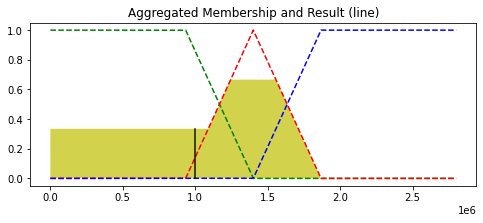

In [ ]:
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedikit, "g", linewidth=1.5, linestyle="--")
ax0.plot(x_produksi_bumbu, produksi_bumbu_sedang, "r", linewidth=1.5, linestyle="--")
ax0.plot(x_produksi_bumbu, produksi_bumbu_banyak, "b", linewidth=1.5, linestyle="--")

ax0.fill_between(x_produksi_bumbu, produksi0, aggregated, facecolor = "y", alpha=0.7)
ax0.plot([produksi_bumbu_dapur, produksi_bumbu_dapur], [0, aktivasi_produksi],"black", linewidth=1.5, alpha=0.9)
ax0.set_title("Aggregated Membership and Result (line)")